# Project
- Resolver un Problema que no tenga solucion.

## ENTREGAR
-  CODIGO QUE SERA ESTE DOCUMENTO BIEN DOCUMENTADO.  Que sea leible. 
-  PPT
-  VIDEO


In [2]:
import pandas as pd

In [3]:
# ===============================
# Load the saved CSV
# ===============================
data = pd.read_csv('nasdaq_data.csv', parse_dates=['Date'], index_col='Date')

# ===============================
# Display the first 5 rows
# ===============================
print("===== Head of the dataset =====")
print(data.head())

# ===============================
# Display descriptive statistics
# ===============================
print("\n===== Descriptive statistics =====")
print(data.describe())

===== Head of the dataset =====
                                   Open          High           Low  \
Date                                                                  
2022-02-18 00:00:00-05:00  13735.400391  13762.400391  13465.559570   
2022-02-22 00:00:00-05:00  13424.360352  13618.719727  13249.650391   
2022-02-23 00:00:00-05:00  13511.750000  13533.780273  13032.169922   
2022-02-24 00:00:00-05:00  12587.879883  13486.110352  12587.879883   
2022-02-25 00:00:00-05:00  13485.259766  13696.860352  13358.290039   

                                  Close      Volume  Dividends  Stock Splits  \
Date                                                                           
2022-02-18 00:00:00-05:00  13548.070312  4501940000        0.0           0.0   
2022-02-22 00:00:00-05:00  13381.519531  4849170000        0.0           0.0   
2022-02-23 00:00:00-05:00  13037.490234  4639330000        0.0           0.0   
2022-02-24 00:00:00-05:00  13473.589844  6180200000        0.0        

In [4]:
print("===== Column names and data types =====")
print(data.dtypes)

===== Column names and data types =====
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Dividends          float64
Stock Splits       float64
RSI                float64
MACD               float64
MACD_Signal        float64
Bollinger_Width    float64
MFI                float64
EMA_20             float64
ATR_14             float64
ADX_14             float64
OBV                  int64
Stoch_%K           float64
Stoch_%D           float64
dtype: object


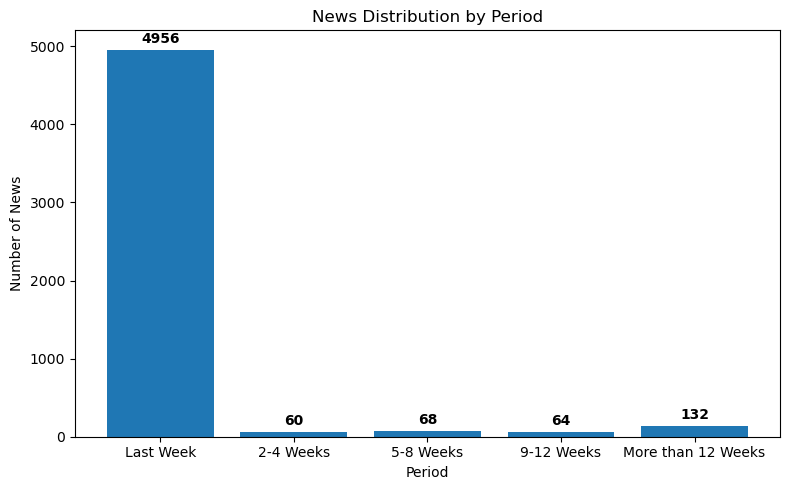

In [ ]:
# -------------------------------
# 📅 Paso 1: Importar librerías
# -------------------------------

import pandas as pd
from datetime import datetime, timedelta
import re
import matplotlib.pyplot as plt

# -------------------------------
# 📄 Paso 2: Cargar archivo CSV
# -------------------------------

df = pd.read_csv('news_data.csv')

# -------------------------------
# 🔄 Paso 3: Función para convertir fechas relativas
# -------------------------------

def parse_relative_date(text):
    text = str(text).lower()
    today = datetime(2025, 3, 31)
    
    if 'minute' in text or 'hour' in text or 'just now' in text:
        return today
    elif 'day' in text:
        days = int(re.search(r'(\d+)\s+day', text).group(1))
        return today - timedelta(days=days)
    elif 'week' in text:
        weeks = int(re.search(r'(\d+)\s+week', text).group(1))
        return today - timedelta(weeks=weeks)
    elif 'month' in text:
        months = int(re.search(r'(\d+)\s+month', text).group(1))
        return today - timedelta(days=months * 30)
    elif 'year' in text:
        years = int(re.search(r'(\d+)\s+year', text).group(1))
        return today - timedelta(days=years * 365)
    else:
        return None

# -------------------------------
# Paso 4: Aplicar conversión de fechas
# -------------------------------

df['parsed_date'] = df['Date'].apply(parse_relative_date)

# -------------------------------
# Paso 5: Crear las categorías de semanas
# -------------------------------

today = datetime(2025, 3, 31)

def classify_week_group(date):
    if pd.isnull(date):
        return 'Unknown'
    delta = (today - date).days
    if delta <= 7:
        return 'Last Week'
    elif 8 <= delta <= 28:
        return '2-4 Weeks'
    elif 29 <= delta <= 56:
        return '5-8 Weeks'
    elif 57 <= delta <= 84:
        return '9-12 Weeks'
    elif delta > 84:
        return 'More than 12 Weeks'
    else:
        return 'Unknown'

df['Period'] = df['parsed_date'].apply(classify_week_group)

# -------------------------------
# Paso 6: Distribución de Frecuencias
# -------------------------------

frequency_by_period = df['Period'].value_counts().reindex(['Last Week', '2-4 Weeks', '5-8 Weeks', '9-12 Weeks', 'More than 12 Weeks'])

# -------------------------------
#  Paso 7: Gráfico de barras con etiquetas
# -------------------------------

plt.figure(figsize=(8,5))
bars = plt.bar(frequency_by_period.index, frequency_by_period.values)
plt.xlabel('Period')
plt.ylabel('Number of News')
plt.title('News Distribution by Period')

# Etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0,3), textcoords="offset points", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [19]:
import json
from collections import Counter

# Counter to store counts per day
day_counter = Counter()

# Read and count
with open('trump_news_week.json', 'r') as f:
    for line in f:
        data = json.loads(line.strip())
        day = data.get('date')
        if day:
            day_counter[day] += 1

# Print results
print("\n📊 Number of links collected per day:")
for day, count in sorted(day_counter.items()):
    print(f"{day}: {count} links")

# Total links
print(f"\n✅ Total number of links collected: {sum(day_counter.values())}")


📊 Number of links collected per day:
22.03.25: 6 links
23.03.25: 1 links
25.03.25: 1 links
27.03.25: 12 links
28.03.25: 6 links
29.03.25: 6 links
30.03.25: 6 links
31.03.25: 12 links

✅ Total number of links collected: 50


In [20]:
import pandas as pd

# Load the CSV
df = pd.read_csv('news_content.csv')

# Count number of rows (each row = 1 article)
total_articles = len(df)

print(f"✅ Total number of articles (links) in news_content.csv: {total_articles}")
print(df.columns)
print("===== Head of the dataset =====")

✅ Total number of articles (links) in news_content.csv: 50
Index(['date', 'link', 'content'], dtype='object')
===== Head of the dataset =====


In [4]:
# Read the CSV file
df1 = pd.read_csv('news_contentCarlos.csv')


df1['date'] = pd.to_datetime(df1['date'], format='%d.%m.%y', errors='coerce')


print(df1.info())
print(df1.describe())
print(df1.head())
print(df1.columns)  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     0 non-null      datetime64[ns]
 1   link     9986 non-null   object        
 2   content  9682 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 234.2+ KB
None
      date
count    0
mean   NaT
min    NaT
25%    NaT
50%    NaT
75%    NaT
max    NaT
  date                                               link  \
0  NaT  https://www.npr.org/2025/04/09/nx-s1-5357405/s...   
1  NaT  https://www.aljazeera.com/news/2025/4/8/under-...   
2  NaT  https://www.npr.org/2025/04/09/nx-s1-5356480/n...   
3  NaT  https://www.aljazeera.com/news/2017/2/21/profi...   
4  NaT  https://www.npr.org/2025/04/09/nx-s1-5357645/t...   

                                             content  
0  U.S. stocks soar in an incredible rally after ...  
1  The Justice Department says it will